In [1]:
from numpy import *
 
import convert
from plotting.draw import *  # noqa
import src.bins as bins  # noqa
from src.dut_analysis import DUTAnalysis, Analysis
from src.batch_analysis import BatchAnalysis
from src.run import load_nrs
from src.scan import Ensemble, Scan, VScan, TScan
from utility.utils import *  # noqa
from functools import partial

Welcome to JupyROOT 6.26/10


In [2]:
run = 485
verbose=0
test=0
testcampaign='201912'
batch='v1'
dut=0
do_convert=0
remove_meta=0
runplan=None

In [3]:
if runplan is not None:
    from src.spreadsheet import make
    make(runplan)
    exit(2)

ensembles = load_json(Ensemble.FilePath)

if run in ensembles:
    s = VScan if 'v-' in run else TScan if 't-' in run else Scan
    z = s(run, verbose, test)

else:
    ana = Analysis(testcampaign)
    runs = load_nrs(ana.BeamTest.Path)
    is_batch = not (run in runs and batch is None)
    dut_ana = partial(BatchAnalysis, choose(batch, run)) if is_batch else partial(DUTAnalysis, run)
    dut_ana = partial(dut_ana, dut, testcampaign)

    if is_batch:
        bc = convert.BatchConvert(dut_ana.args[0], dut_ana.args[-1], verbose=False, force=False)
        if do_convert:
            remove_file(bc.Batch.FileName)
            bc.remove_aux_files()
        if not bc.Batch.FileName.exists() and not test:
            bc.run()

    if remove_meta:
        z = dut_ana(verbose=False, test=True)
        z.remove_metadata()

    if do_convert and not is_batch:
        z = dut_ana(verbose=False, test=True)
        z.remove_file()
        z.Converter.remove_aux_files()

    z = dut_ana(verbose=verbose, test=test)


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
STARTING BATCH ANALYSIS of D02, batch v1 (Dec 2019), 18.80M ev |
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



INFO:     15:28:01 --> saving plot: SignalDist

INFO:     15:28:01 --> wrote file /home/dmitry/mounts/high-rate/content/duts/D02/201912/b-v1/SignalDist.html
INFO:     15:28:01 --> https://diamond.ethz.ch/high-rate/content/duts/D02/201912/b-v1/SignalDist.html


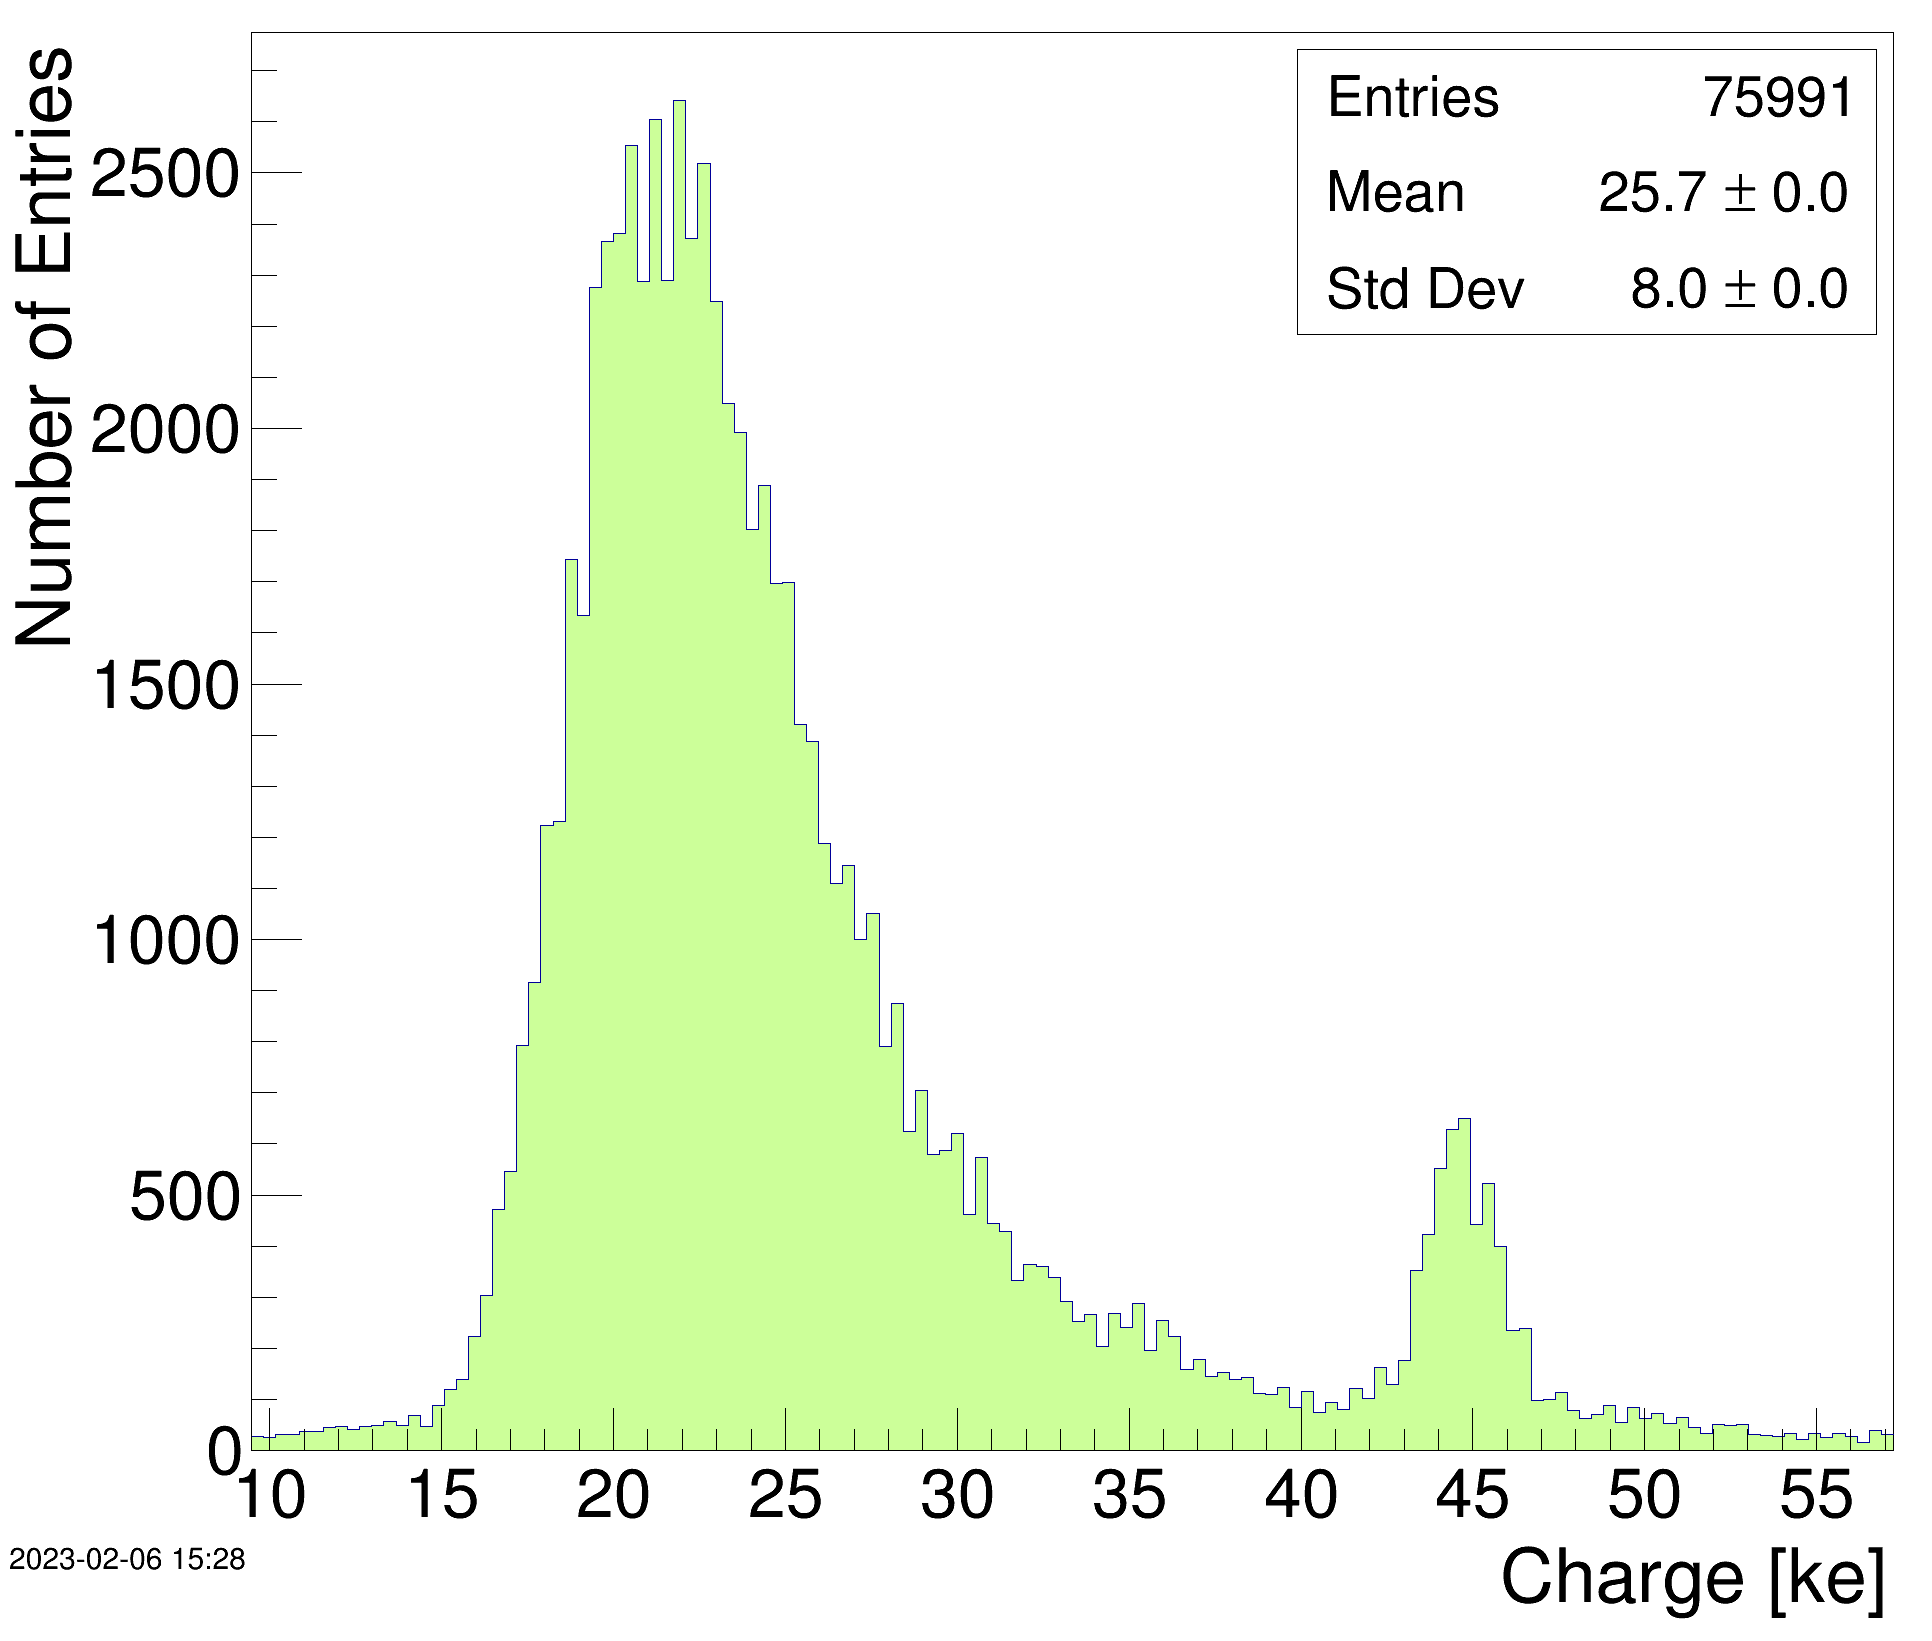

In [4]:
z.draw_charge_distribution()
get_last_canvas().Draw()